<a href="https://colab.research.google.com/github/Oreki820/Projetos-EBAC/blob/main/Profissao_Cientista_de_Dados_M34_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

In [5]:
# baixando o data set
df = pd.read_csv("/content/ALUGUEL_MOD12 (1).csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


In [6]:
# y = variável alvo (Valor do Aluguel)
y = df["Valor_Aluguel"]

In [7]:
# X = variável explicativa escolhida (Metragem)
X = df[["Metragem"]]

In [8]:
# Exibindo as 5 primeiras linhas para conferir
print(df.head())
print("\nX (Metragem):")
print(X.head())
print("\ny (Valor_Aluguel):")
print(y.head())

   Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
0            480               295        48          2            2   
1            500                 0        50          1            2   
2            500                 0        40          1            2   
3            500                36        45          1            2   
4            500                 0        30          1            1   

   N_Suites  N_Vagas  
0         1        1  
1         1        1  
2         1        1  
3         1        0  
4         0        0  

X (Metragem):
   Metragem
0        48
1        50
2        40
3        45
4        30

y (Valor_Aluguel):
0    480
1    500
2    500
3    500
4    500
Name: Valor_Aluguel, dtype: int64


# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [13]:
# Criando o transformadondo polinomial com grau 2
poly2 = PolynomialFeatures(degree=2)

In [14]:
# Aplicando a transformação em X (Metragem)
X_poly2 = poly2.fit_transform(X)

In [15]:
#Verificando o resultado
print("Formato original de X:", X.shape)
print("Novo formato de X após PolynomialFeatures (degree=2):", X_poly2.shape)

# Exibindo algumas linhas transformadas
print("\nExemplo das primeiras linhas (Metragem e Metragem^2):")
print(X_poly2[:5])

Formato original de X: (7203, 1)
Novo formato de X após PolynomialFeatures (degree=2): (7203, 3)

Exemplo das primeiras linhas (Metragem e Metragem^2):
[[1.000e+00 4.800e+01 2.304e+03]
 [1.000e+00 5.000e+01 2.500e+03]
 [1.000e+00 4.000e+01 1.600e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 3.000e+01 9.000e+02]]


# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [17]:
# Separando os dados em treino e teste (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_poly2,
    y,
    test_size=0.2,
    random_state=42
)

In [18]:
# Criando o modelo de Regressão
modelo = LinearRegression()
# Treinando o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

In [19]:
print("Coeficientes do modelo:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

Coeficientes do modelo: [ 0.00000000e+00  4.42826866e+01 -2.89778247e-02]
Intercepto: -632.1353054871074


4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

In [21]:
y_pred = modelo.predict(X_teste)

In [22]:
r2 = r2_score(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
mae = mean_absolute_error(y_teste, y_pred)

In [23]:
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.5711
MSE: 4645995.5646
MAE: 1225.4696


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


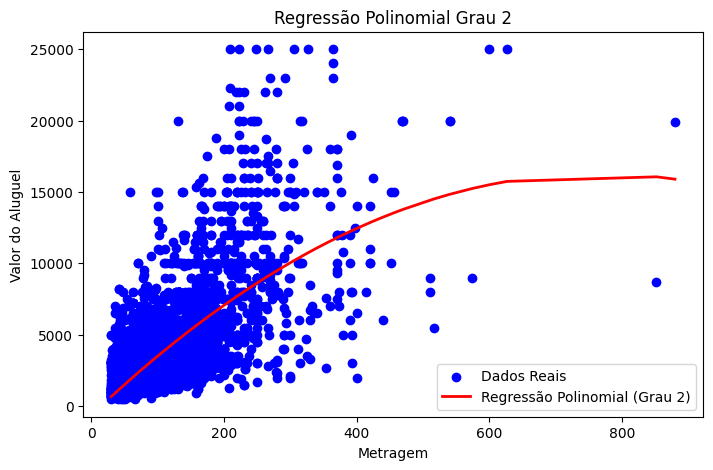

In [24]:
X_original = X.values.reshape(-1, 1)

X_sorted_index = np.argsort(X_original[:, 0])
X_sorted = X_original[X_sorted_index]

X_sorted_poly = poly2.transform(X_sorted)

y_sorted_pred = modelo.predict(X_sorted_poly)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label='Regressão Polinomial (Grau 2)')
plt.xlabel("Metragem")
plt.ylabel("Valor do Aluguel")
plt.title("Regressão Polinomial Grau 2")
plt.legend()
plt.show()

# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

In [25]:
poly4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly4 = poly4.fit_transform(X)

In [26]:
X_treino4, X_teste4, y_treino4, y_teste4 = train_test_split(
    X_poly4, y, test_size=0.2, random_state=42
)

In [27]:
modelo4 = LinearRegression()
modelo4.fit(X_treino4, y_treino4)

LinearRegression()

In [28]:
y_pred4 = modelo4.predict(X_teste4)

In [29]:
r2_4 = r2_score(y_teste4, y_pred4)
mse_4 = mean_squared_error(y_teste4, y_pred4)
mae_4 = mean_absolute_error(y_teste4, y_pred4)

In [30]:
print("=== RESULTADOS MODELO GRAU 4 ===")
print(f"R²: {r2_4:.4f}")
print(f"MSE: {mse_4:.4f}")
print(f"MAE: {mae_4:.4f}")

=== RESULTADOS MODELO GRAU 4 ===
R²: 0.5585
MSE: 4782486.1081
MAE: 1194.1280


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


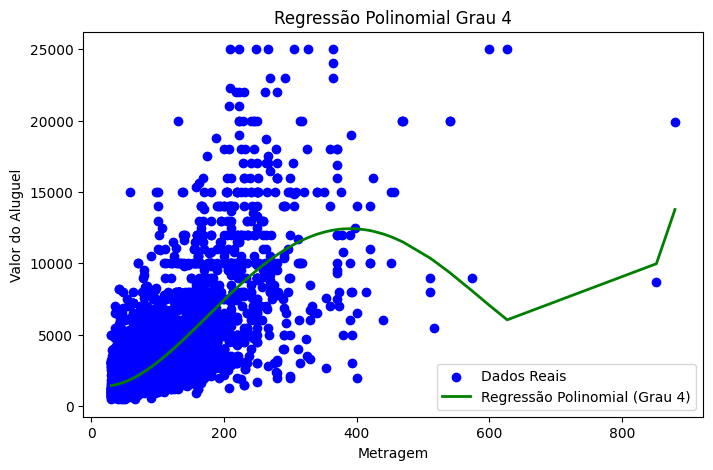

In [31]:
X_sorted = X_original[X_sorted_index]
X_sorted_poly4 = poly4.transform(X_sorted)
y_sorted_pred4 = modelo4.predict(X_sorted_poly4)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(X_sorted, y_sorted_pred4, color='green', linewidth=2, label='Regressão Polinomial (Grau 4)')
plt.xlabel("Metragem")
plt.ylabel("Valor do Aluguel")
plt.title("Regressão Polinomial Grau 4")
plt.legend()
plt.show()

In [32]:
#Comparando com o modelo anterior (grau 2)
print("\n=== COMPARAÇÃO ENTRE MODELOS ===")
print(f"R² grau 2: {r2:.4f}")
print(f"R² grau 4: {r2_4:.4f}")

if r2_4 > r2:
    print("✅ O modelo de grau 4 teve desempenho MELHOR que o de grau 2.")
else:
    print("⚠️ O modelo de grau 4 NÃO melhorou o desempenho em relação ao grau 2.")


=== COMPARAÇÃO ENTRE MODELOS ===
R² grau 2: 0.5711
R² grau 4: 0.5585
⚠️ O modelo de grau 4 NÃO melhorou o desempenho em relação ao grau 2.


# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.

Quando eu treino modelos de regressão, às vezes eles sofrem **overfitting**, principalmente quando tenho muitas variáveis ou quando algumas delas são parecidas entre si. Para resolver isso, eu posso aplicar regularização, que é uma forma de “punir” coeficientes muito grandes no modelo.

**Ridge (L2):**

No Ridge, a regularização penaliza os coeficientes grandes, mas não zera nenhum deles. Ou seja, todas as variáveis continuam no modelo, só que com pesos menores. Eu uso Ridge quando quero reduzir overfitting, mas não quero perder nenhuma variável. Funciona bem quando as variáveis estão correlacionadas.

**Lasso (L1):**

O Lasso também penaliza os coeficientes, mas de uma forma que pode zerar completamente alguns deles. Na prática, ele faz uma seleção de variáveis automaticamente. Eu uso Lasso quando quero um modelo mais simples, com menos variáveis, e entender quais features são realmente importantes.

**Elastic Net (L1 + L2):**

O Elastic Net combina Ridge e Lasso ao mesmo tempo. Ele reduz overfitting e pode eliminar variáveis irrelevantes. Eu gosto de usar Elastic Net quando tenho muitas variáveis, algumas correlacionadas e quero um equilíbrio entre reduzir complexidade e selecionar features.

✅ Em resumo:

Ridge: mantém todas as variáveis, só diminui os pesos.

Lasso: pode eliminar variáveis, deixando o modelo mais simples.

Elastic Net: mistura os dois e costuma ser o mais equilibrado.

# **Módulo Extra - Testando Curiosidades**

módulo criado por mim mesmp para testes

**ETAPA EXTRA 1 – Testar graus 1 a 6 automaticamente**

Objetivo:

Gerar PolynomialFeatures para cada grau (1 a 6)

Treinar o modelo

Calcular métricas (R², MSE, MAE)

Salvar tudo em uma tabela

Mostrar qual grau foi o melhor

In [42]:
# Garantindo que temos X e y corretos
X = df[["Metragem"]]
y = df["Valor_Aluguel"]

# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Lista para armazenar os resultados
resultados = []

# Testando graus de 1 a 6
for grau in range(1, 7):
    modelo = Pipeline([
        ('poly', PolynomialFeatures(degree=grau, include_bias=False)),
        ('linear', LinearRegression())
    ])

    # Treinando
    modelo.fit(X_train, y_train)

    # Prevendo
    y_pred = modelo.predict(X_test)

    # Calculando as métricas
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Armazenar resultado
    resultados.append({
        "Grau": grau,
        "R²": r2,
        "MSE": mse,
        "MAE": mae
    })

# Convertendo para DataFrame
tabela_resultados = pd.DataFrame(resultados)
print(tabela_resultados)

# Melhor grau baseado no R²
melhor_grau = tabela_resultados.loc[tabela_resultados["R²"].idxmax()]
print("\nMelhor modelo encontrado:")
print(melhor_grau)


   Grau        R²           MSE          MAE
0     1  0.569799  4.659582e+06  1211.910046
1     2  0.571054  4.645996e+06  1225.469554
2     3  0.558009  4.787286e+06  1213.825190
3     4  0.558452  4.782486e+06  1194.128016
4     5  0.567534  4.684120e+06  1196.858535
5     6  0.449612  5.961353e+06  1209.669765

Melhor modelo encontrado:
Grau    2.000000e+00
R²      5.710538e-01
MSE     4.645996e+06
MAE     1.225470e+03
Name: 1, dtype: float64


A regressão linear já explica bem a relação entre metragem e aluguel, mas adicionar termos quadráticos (grau 2) traz uma leve melhoria, capturando uma curvatura natural nos dados. A partir do grau 3, o modelo começa a sofrer overfitting, perdendo capacidade de generalizar. O grau 6 mostra overfitting extremo, com forte queda no R². Portanto, o melhor modelo é o grau 2, pois oferece o melhor equilíbrio entre desempenho e simplicidade

**ETAPA EXTRA 2 – Cross-Validation (K-Fold)**

Objetivo:

Avaliar o modelo de forma mais confiável e robusta do que apenas usando um único treino/teste.

Em vez de dividir os dados 1 vez, o K-Fold:

Divide o dataset em K partes (ex: 5 folds)

Treina 5 vezes em combinações diferentes

Faz média dos resultados

In [47]:
# Criando K-Fold (5 divisões)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

resultados_cv = []

# Testando graus de 1 a 6
for grau in range(1, 7):
    modelo = Pipeline([
        ('poly', PolynomialFeatures(degree=grau, include_bias=False)),
        ('linear', LinearRegression())
    ])

    # Cross-validation com R²
    scores = cross_val_score(modelo, X, y, cv=kfold, scoring='r2')

    # Armazenando médias e desvios
    resultados_cv.append({
        "Grau": grau,
        "R² Médio (CV)": scores.mean(),
        "Desvio Padrão": scores.std()
    })

    # Mostrando os resultados
tabela_cv = pd.DataFrame(resultados_cv)
print(tabela_cv)

# Melhor grau pelo R² médio
melhor_grau_cv = tabela_cv.loc[tabela_cv["R² Médio (CV)"].idxmax()]
print("\nMelhor modelo com Cross-Validation:")
print(melhor_grau_cv)


   Grau  R² Médio (CV)  Desvio Padrão
0     1       0.532235       0.039413
1     2       0.536030       0.031649
2     3       0.538152       0.025824
3     4       0.545193       0.022453
4     5       0.546438       0.026382
5     6       0.509873       0.054660

Melhor modelo com Cross-Validation:
Grau             5.000000
R² Médio (CV)    0.546438
Desvio Padrão    0.026382
Name: 4, dtype: float64


A análise com treino/teste único apontou o grau 2 como melhor modelo, porém a cross-validation mostrou que o grau 5 apresenta melhor desempenho médio e maior estabilidade. Isso evidencia a importância de avaliar modelos com técnicas mais robustas, como K-Fold, antes de decidir o grau ideal. O grau 6 sofre overfitting, enquanto o grau 5 atinge o melhor equilíbrio entre desempenho e generalização.

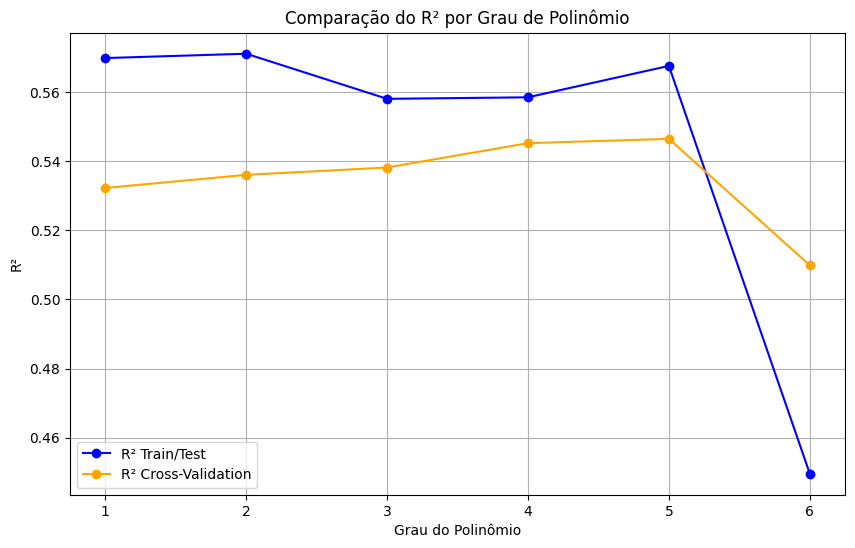

In [49]:
import matplotlib.pyplot as plt

r2_treino_teste = tabela_resultados["R²"].values

# Resultados do cross-validation
r2_cv = tabela_cv["R² Médio (CV)"].values

# Graus de polinômio (1 a 6)
graus = tabela_resultados["Grau"].values

# Criando o gráfico
plt.figure(figsize=(10,6))
plt.plot(graus, r2_treino_teste, marker='o', label='R² Train/Test', color='blue')
plt.plot(graus, r2_cv, marker='o', label='R² Cross-Validation', color='orange')


plt.title("Comparação do R² por Grau de Polinômio")
plt.xlabel("Grau do Polinômio")
plt.ylabel("R²")
plt.xticks(graus)
plt.legend()
plt.grid(True)
plt.show()


O gráfico mostra claramente que:

R² (train/test) tem uma leve oscilação, mas despenca no grau 6, indicando overfitting extremo.

R² (cross-validation) sobe de forma mais estável até o grau 5, mostrando que o modelo realmente melhora de forma consistente até esse ponto.

O grau 5 é o melhor em generalização, enquanto o grau 2 só parecia o melhor no train/test único.

Conclusão:

Cross-Validation revelou a verdade: modelos simples (grau 1 e 2) são bons, mas o grau 5 oferece o melhor equilíbrio entre desempenho e estabilidade.

Já o grau 6 começa a aprender “ruído”, perdendo capacidade de generalização.

**ETAPA EXTRA 3 – GRÁFICOS DE RESÍDUOS**

o que vamos comparar nesses gráficos:

🔵 Modelo Grau 2

Se os resíduos estiverem espalhados aleatoriamente, o modelo é adequado.

Se houver curva ou padrão, o modelo não capturou alguma relação não linear.

🟢 Modelo Grau 5

Pode ter resíduos menores (bom)

MAS se começar a ter padrões estranhos ou pontos extremos, pode ter começado a aprender ruído (overfitting!)

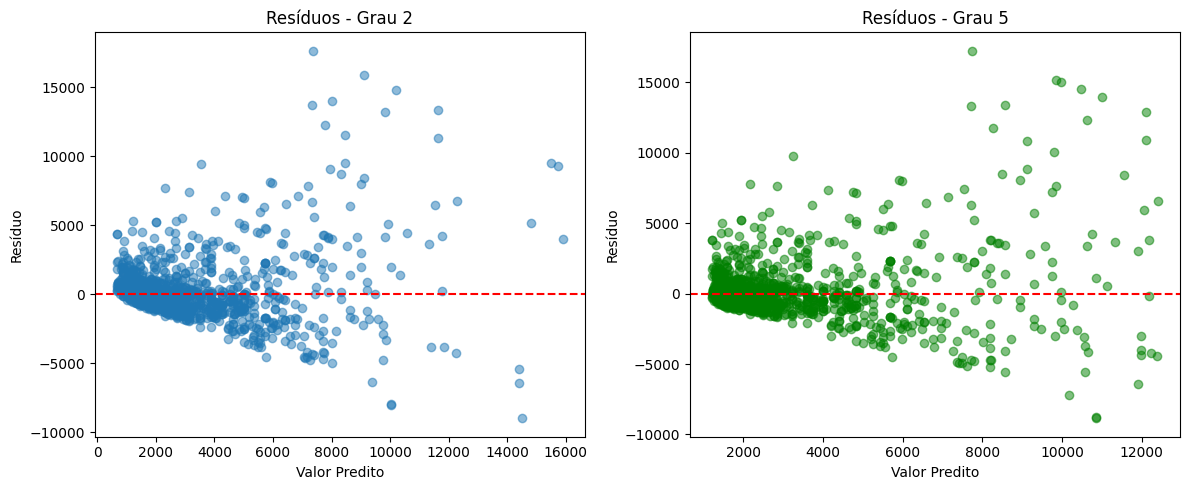

In [50]:
# Modelo Grau 2
modelo_2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])
modelo_2.fit(X_train, y_train)
y_pred2 = modelo_2.predict(X_test)
residuos2 = y_test - y_pred2

# Modelo Grau 5
modelo_5 = Pipeline([
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('linear', LinearRegression())
])
modelo_5.fit(X_train, y_train)
y_pred5 = modelo_5.predict(X_test)
residuos5 = y_test - y_pred5

# Plot dos resíduos
plt.figure(figsize=(12,5))

# Resíduos Grau 2
plt.subplot(1, 2, 1)
plt.scatter(y_pred2, residuos2, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Resíduos - Grau 2")
plt.xlabel("Valor Predito")
plt.ylabel("Resíduo")

# Resíduos Grau 5
plt.subplot(1, 2, 2)
plt.scatter(y_pred5, residuos5, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Resíduos - Grau 5")
plt.xlabel("Valor Predito")
plt.ylabel("Resíduo")

plt.tight_layout()
plt.show()


O modelo de grau 5 apresenta resíduos um pouco mais centrados e distribui melhor os erros do que o grau 2, confirmando a análise do cross-validation. No entanto, ambos os modelos ainda sofrem com heterocedasticidade e outliers, o que indica que apenas aumentar o grau do polinômio não é suficiente. Para melhorar de verdade, seria necessário adicionar mais variáveis (multivariado) ou aplicar técnicas de regularização ou transformação

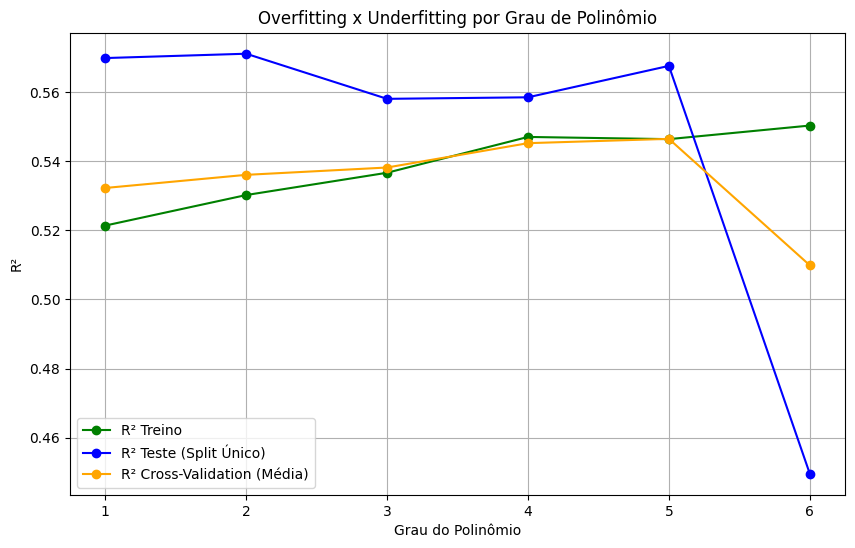

In [53]:
# R² Treino para cada grau
r2_treino = []
for grau in range(1,7):
    modelo = Pipeline([
        ('poly', PolynomialFeatures(degree=grau, include_bias=False)),
        ('linear', LinearRegression())
    ])
    modelo.fit(X_train, y_train)
    r2_treino.append(modelo.score(X_train, y_train))  # score = R² no treino

# R² Teste (tabela_resultados)
r2_teste = tabela_resultados["R²"].values

# Cross-Validation (tabela_cv)
r2_cv = tabela_cv["R² Médio (CV)"].values

# Graus (1 a 6)
graus = tabela_resultados["Grau"].values

# Criando gráfico
plt.figure(figsize=(10,6))
plt.plot(graus, r2_treino, marker='o', label='R² Treino', color='green')
plt.plot(graus, r2_teste, marker='o', label='R² Teste (Split Único)', color='blue')
plt.plot(graus, r2_cv, marker='o', label='R² Cross-Validation (Média)', color='orange')

plt.title("Overfitting x Underfitting por Grau de Polinômio")
plt.xlabel("Grau do Polinômio")
plt.ylabel("R²")
plt.xticks(graus)
plt.grid(True)
plt.legend()
plt.show()

Nesse gráfico eu consigo visualizar claramente como o grau do polinômio afeta o comportamento do modelo. A linha verde (R² Treino) sobe continuamente, o que mostra que, quanto mais complexo o modelo fica, melhor ele se adapta aos dados de treino. Isso é esperado, porque modelos mais complexos têm mais capacidade de "decorar" os dados.

Porém, a linha azul (R² Teste com split único) mostra que depois do grau 2 o desempenho começa a oscilar e no grau 6 despenca drasticamente. Isso é um forte sinal de overfitting, porque o modelo aprendeu demais o treino e perdeu a capacidade de generalização.

A linha laranja (R² Cross-Validation) é a mais confiável, pois avalia o modelo em várias divisões dos dados. Ela mostra que o desempenho melhora de forma estável até o grau 5, atingindo seu melhor valor antes de cair no grau 6. Isso prova que o grau 5 é o melhor equilíbrio entre capacidade de aprender padrões e generalizar bem.

# **Finalização**

Nesse módulo de Regressão Polinomial, eu aprendi que nem sempre aumentar a complexidade do modelo significa melhorar o resultado. Comecei testando apenas a variável Metragem para prever o valor do aluguel e fui aumentando o grau do polinômio aos poucos. No começo, o modelo melhorou, mas depois de certo ponto, principalmente no grau 6, ele começou a piorar muito – isso é o overfitting, quando o modelo aprende demais os dados de treino e não generaliza bem.

Para avaliar melhor, usei métricas (R², MSE e MAE), depois comparei os modelos com train/test e também com cross-validation, que é uma forma muito mais confiável de validar. Vi que, no teste simples, o grau 2 parecia o melhor, mas na validação cruzada o grau 5 teve o melhor desempenho médio, mostrando que o método de avaliação pode mudar totalmente a conclusão.

Também fiz gráficos de resíduos para entender os erros e percebi que os modelos ainda tinham heterocedasticidade, ou seja, erravam mais em valores altos. No fim, analisei overfitting e underfitting com um gráfico comparando R² de treino, teste e cross-validation. Isso me mostrou visualmente até onde o modelo melhora e quando começa a “memorizar” os dados.

No geral, aprendi que modelagem não é só treinar e ver um número. É testar diferentes graus, avaliar com cuidado, analisar resíduos, usar cross-validation e entender o impacto da complexidade. A regressão polinomial pode ser poderosa, mas precisa de equilíbrio – e a melhor escolha depende da qualidade da generalização, não apenas do ajuste no treino.